In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stratified_computer_prices = pd.read_csv("../data/stratified_computer_prices_sample.csv")

In [3]:
stratified_computer_prices[['resolution_width', 'resolution_height']] = stratified_computer_prices['resolution'].str.split('x', expand=True).astype(int)
stratified_computer_prices['aspect_ratio'] = np.round(stratified_computer_prices['resolution_width'] / stratified_computer_prices['resolution_height'], 2)
stratified_computer_prices.drop('resolution', axis=1, inplace=True)

In [4]:
def extract_cpu_type(cpu_model):
    parts = cpu_model.replace("-", " ").split()

    if parts[0] in ["AMD", "Intel"]:
        parts = parts[:-1]
        
    parts = parts[1:]

    return " ".join(parts).strip()

stratified_computer_prices['cpu_type'] = stratified_computer_prices['cpu_model'].apply(extract_cpu_type)
stratified_computer_prices.drop(['model', 'cpu_model'], axis=1, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [6]:
X = stratified_computer_prices.copy()
y = X.pop('price')

price_bins = pd.qcut(y, q=5, labels=False)

preprocessor = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False), make_column_selector(dtype_include=object))
)

X = preprocessor.fit_transform(X)
y = np.log(y)

X_train, X_temp, y_train, y_temp, bins_train, bins_temp = train_test_split(X, y, price_bins, test_size=0.2, random_state=42, stratify=price_bins)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=bins_temp)

In [7]:
from tensorflow import keras
from tensorflow.keras import Input, layers, callbacks

In [29]:
input_shape = (X_train.shape[1],)

model1 = keras.Sequential([
    Input(shape=input_shape),

    layers.BatchNormalization(),
    layers.Dense(units=256, activation='relu'),
    layers.Dropout(rate=0.3),
    
    layers.BatchNormalization(),
    layers.Dense(units=128, activation='relu'),
    layers.Dropout(rate=0.2),
    
    layers.BatchNormalization(),
    layers.Dense(units=64, activation='relu'),
    layers.Dropout(rate=0.1),

    layers.Dense(units=1, activation='linear')
])

model1.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mse']
)

early_stopping1 = callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=1e-4,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

history1 = model1.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=200,
    verbose=0,
    callbacks=[early_stopping1]
)

Epoch 51: early stopping
Restoring model weights from the end of the best epoch: 41.


In [11]:
model2 = keras.Sequential([
    Input(shape=input_shape),

    layers.BatchNormalization(),
    layers.Dense(units=256, activation='selu'),
    layers.Dropout(rate=0.3),
    
    layers.BatchNormalization(),
    layers.Dense(units=128, activation='selu'),
    layers.Dropout(rate=0.2),
    
    layers.BatchNormalization(),
    layers.Dense(units=64, activation='selu'),
    layers.Dropout(rate=0.1),

    layers.Dense(units=1, activation='linear')
])

model2.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mse']
)

early_stopping2 = callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=1e-4,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

history2 = model2.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=200,
    verbose=0,
    callbacks=[early_stopping2]
)

Epoch 53: early stopping
Restoring model weights from the end of the best epoch: 43.


In [31]:
model3 = keras.Sequential([
    Input(shape=input_shape),

    layers.BatchNormalization(),
    layers.Dense(units=256, activation='elu'),
    layers.Dropout(rate=0.3),
    
    layers.BatchNormalization(),
    layers.Dense(units=128, activation='elu'),
    layers.Dropout(rate=0.2),
    
    layers.BatchNormalization(),
    layers.Dense(units=64, activation='elu'),
    layers.Dropout(rate=0.1),

    layers.Dense(units=1, activation='linear')
])

model3.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mse']
)

early_stopping3 = callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=1e-4,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

history3 = model3.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=200,
    verbose=0,
    callbacks=[early_stopping3]
)

Epoch 40: early stopping
Restoring model weights from the end of the best epoch: 30.


In [30]:
model4 = keras.Sequential([
    Input(shape=input_shape),

    layers.BatchNormalization(),
    layers.Dense(units=256, activation='swish'),
    layers.Dropout(rate=0.3),
    
    layers.BatchNormalization(),
    layers.Dense(units=128, activation='swish'),
    layers.Dropout(rate=0.2),
    
    layers.BatchNormalization(),
    layers.Dense(units=64, activation='swish'),
    layers.Dropout(rate=0.1),

    layers.Dense(units=1, activation='linear')
])

model4.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse',
    metrics=['mse']
)

early_stopping4 = callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=1e-4,
    patience=10,
    verbose=1,
    restore_best_weights=True
)

history4 = model4.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=200,
    verbose=0,
    callbacks=[early_stopping4]
)

Epoch 55: early stopping
Restoring model weights from the end of the best epoch: 45.


Minimum Loss: 0.1867
Minimum Validation Loss: 0.0292


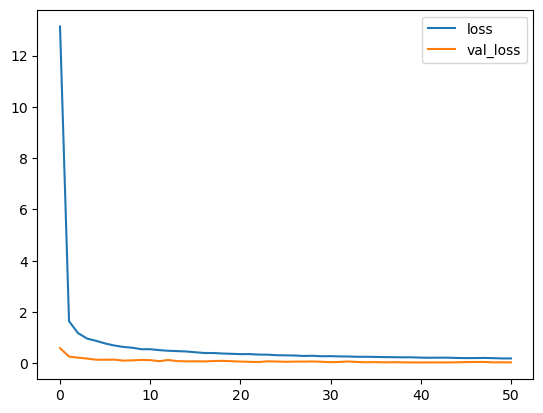

In [32]:
history_df1 = pd.DataFrame(history1.history)
history_df1.loc[:, ['loss', 'val_loss']].plot()

print("Minimum Loss: {:0.4f}".format(history_df1['loss'].min()))
print("Minimum Validation Loss: {:0.4f}".format(history_df1['val_loss'].min()))

Minimum Loss: 0.1300
Minimum Validation Loss: 0.0224


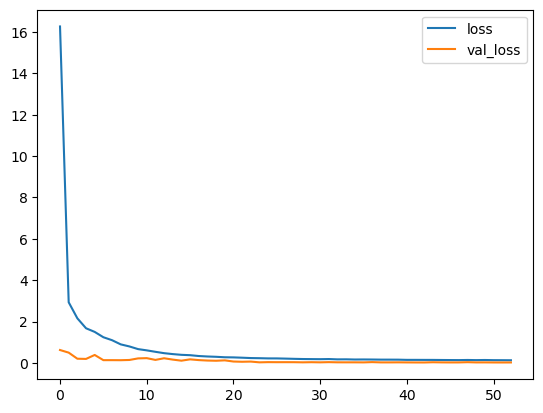

In [33]:
history_df2 = pd.DataFrame(history2.history)
history_df2.loc[:, ['loss', 'val_loss']].plot()

print("Minimum Loss: {:0.4f}".format(history_df2['loss'].min()))
print("Minimum Validation Loss: {:0.4f}".format(history_df2['val_loss'].min()))

Minimum Loss: 0.1461
Minimum Validation Loss: 0.0236


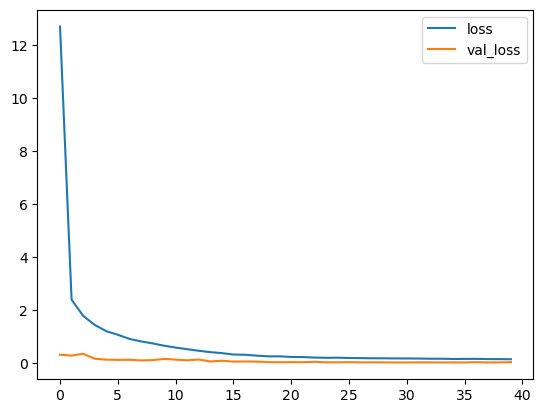

In [34]:
history_df3 = pd.DataFrame(history3.history)
history_df3.loc[:, ['loss', 'val_loss']].plot()

print("Minimum Loss: {:0.4f}".format(history_df3['loss'].min()))
print("Minimum Validation Loss: {:0.4f}".format(history_df3['val_loss'].min()))

Minimum Loss: 0.1266
Minimum Validation Loss: 0.0252


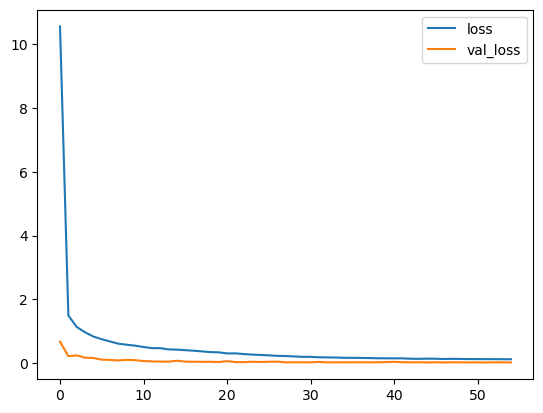

In [35]:
history_df4 = pd.DataFrame(history4.history)
history_df4.loc[:, ['loss', 'val_loss']].plot()

print("Minimum Loss: {:0.4f}".format(history_df4['loss'].min()))
print("Minimum Validation Loss: {:0.4f}".format(history_df4['val_loss'].min()))

In [19]:
from tensorflow.keras import Model

In [39]:
def ensembleModels(models):
    model_input = Input(shape=input_shape)
    y_models = [m(model_input) for m in models]
    y_avg = layers.Average()(y_models)
    return Model(inputs=model_input, outputs=y_avg, name='ensemble')

modelEns = ensembleModels([model1, model2, model3, model4])

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


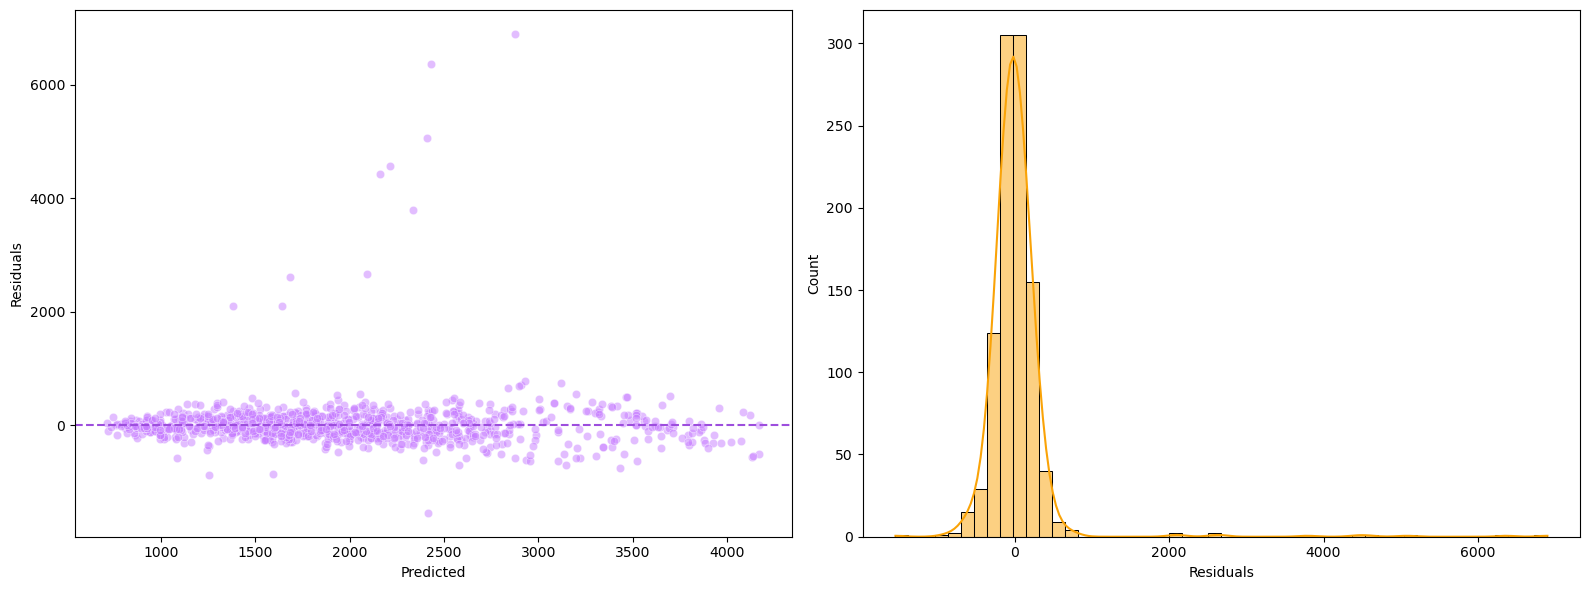

In [40]:
y_pred_log = modelEns.predict(X_test).flatten()

y_pred_price = np.exp(y_pred_log)
y_test_price = np.exp(y_test)

residuals_price = y_test_price - y_pred_price

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred_price, y=residuals_price, color='#c77dff', alpha=0.5)
plt.axhline(0, color='#9d4edd', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals_price, bins=50, color='#faa307', kde=True, line_kws={'color': '#ffba08'})
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

In [38]:
print(f"MAE: ${np.abs(residuals_price).mean():.2f}")
print(f"Median Error: ${np.median(residuals_price):.2f}")
print(f"Std Dev: ${residuals_price.std():.2f}")

MAE: $202.22
Median Error: $-14.79
Std Dev: $487.89
